In [1]:
import sys
sys.path.append('/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/')
from utility import *

# main figure 

number of FP before filtering: 0
number of FP after filtering: 0
number of FP before filtering: 49
number of FP after filtering: 24
number of FP before filtering: 3
number of FP after filtering: 3
number of FP before filtering: 409
number of FP after filtering: 249
number of FP before filtering: 12
number of FP after filtering: 4
number of FP before filtering: 2478
number of FP after filtering: 1793
number of FP before filtering: 1789
number of FP after filtering: 1089
number of FP before filtering: 4334
number of FP after filtering: 4027


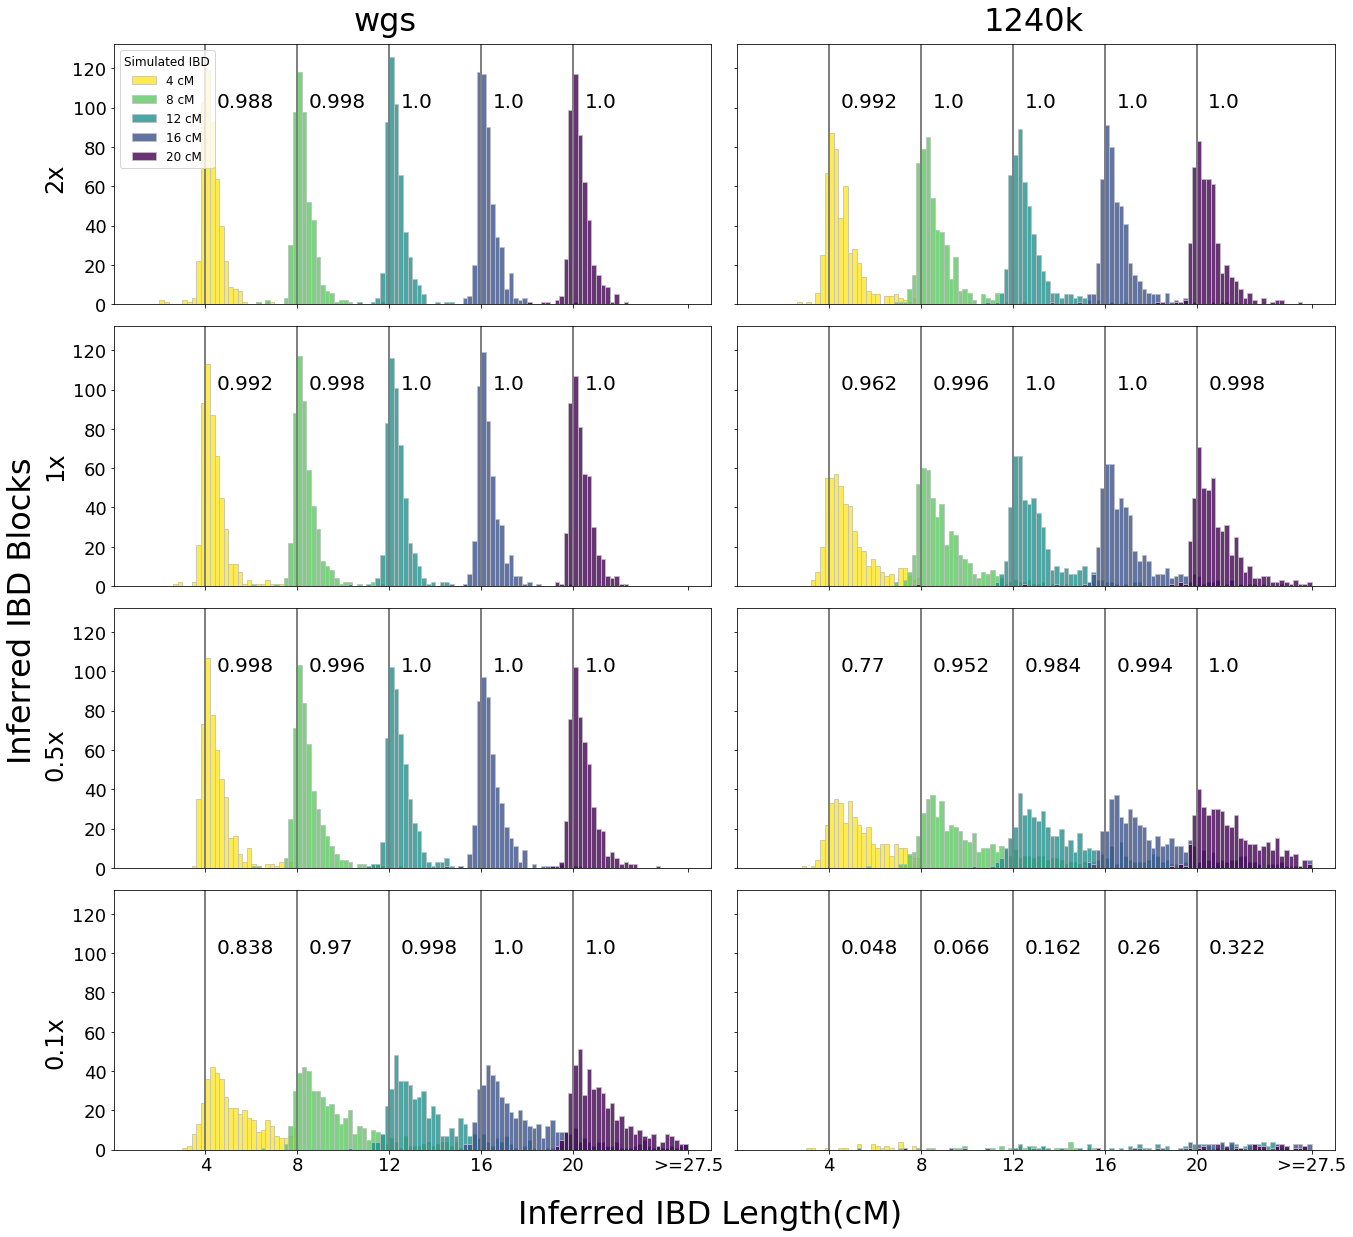

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

plt.rcParams["font.family"] = "Arial"
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(18, 16), tight_layout=True)

covs = ['cov2', 'cov1', 'cov1over2', 'cov1over10']
cov2str = {'cov2':'2x', 'cov1':'1x', 'cov1over2':'0.5x', 'cov1over4':'0.25x', 'cov1over10':'0.1x'}
modes = ['wgs', '1240k']

bl_lens = [4, 8, 12, 16, 20]
bins = np.linspace(0, 25, 126) # bins of 0.2cm

fs_l = 12
fs = 12
fs_t = 18
color_fp = "red"
ec = "silver"
cmap = "viridis_r"
alpha = 0.8
xlim = (0,26)

for row, cov in enumerate(covs):
    for col, mode in enumerate(modes):
        df_fp = pd.read_csv(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_{mode}/calledIBD/{cov}/ch3_0cm/ch3.tsv', sep='\t')
        df_fp = df_fp[df_fp['lengthM']>=0.04]
        print(f'number of FP before filtering: {len(df_fp)}')
        df_fp = df_fp[(df_fp['End'] - df_fp['Start'])/(df_fp['lengthM']*100) >= 220]
        print(f'number of FP after filtering: {len(df_fp)}')
        df_called, powers = lengthCallAll(bl_lens, cov, f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_{mode}/calledIBD', threshold=0.8)
        assert(len(bl_lens)==len(df_called)==len(powers)) # Sanity Check
    
        ### Set Colors
        cmap = cm.get_cmap(cmap)
        colors = [cmap(x) for x in np.linspace(0,1, len(bl_lens))]
    
        ####### Do the actual Plot
        ax = axs[row, col]
        # Plot All Histograms        
        for i in range(len(bl_lens)):
            l = bl_lens[i]
            df_called_trunc = np.array(df_called[i])
            #print(np.mean(df_called_trunc))
            #print(len(df_called_trunc))
            df_called_trunc[df_called_trunc>=27.5] = 27.5
            ax.hist(df_called_trunc, bins = bins, color = colors[i], alpha=alpha, 
                label= str(l) + " cM", ec=ec)
            ax.axvline(l, color = "gray", linewidth=2)
            ax.text(l+0.5, 100, round(powers[i], 3), fontsize=20, fontweight='roman')
    
        # if len(df_fp)>0:
        #     ax.hist(df_fp["lengthM"]*100, bins = bins, color = color_fp, 
        #         alpha=0.5, label= "FP", ec=ec)
        
        ax.set_xlim(xlim)
        ax.set_xticks(bl_lens + [25])
        ax.set_xticklabels(bl_lens + ['>=27.5'])
        ax.tick_params(axis='both', labelsize=fs_t)
        if row == col == 0:
            legend = ax.legend(loc = 'upper left', fontsize = fs_l, title="Simulated IBD")
            legend.get_title().set_fontsize(fs_l)
    fig.text(-0.005, 7/8 - row/4, cov2str[cov], ha='center', va='center', rotation='vertical', fontsize=24)


fig.text(0.25, 1.01, 'wgs', ha='center', va='center', fontsize=32)
fig.text(0.75, 1.01, '1240k', ha='center', va='center', fontsize=32)

fig.text(0.5, -0.025, 'Inferred IBD Length(cM)', ha='center', va='center', fontsize=32)
fig.text(-0.03, 0.5, 'Inferred IBD Blocks', ha='center', va='center', rotation='vertical', fontsize=32)
plt.savefig('syntheticIBDpanel.png', dpi=300, bbox_inches="tight")
plt.savefig('syntheticIBDpanel.pdf', dpi=300, bbox_inches="tight")

# supplementary figure

number of FP before filtering: 0
number of FP after filtering: 0
number of FP before filtering: 22
number of FP after filtering: 10
number of FP before filtering: 1
number of FP after filtering: 1
number of FP before filtering: 208
number of FP after filtering: 131
number of FP before filtering: 1
number of FP after filtering: 0
number of FP before filtering: 504
number of FP after filtering: 317
number of FP before filtering: 5
number of FP after filtering: 3
number of FP before filtering: 1636
number of FP after filtering: 1158
number of FP before filtering: 44
number of FP after filtering: 19
number of FP before filtering: 5331
number of FP after filtering: 4481
number of FP before filtering: 1059
number of FP after filtering: 603
number of FP before filtering: 5327
number of FP after filtering: 4868
[[ 4.21913238  8.21811161 12.22775245 16.14802785 20.24245271]
 [ 4.27388579  8.27933385 12.27844587 16.2610366  20.30818747]
 [ 4.31404568  8.31963167 12.33627197 16.28583743 20.307036

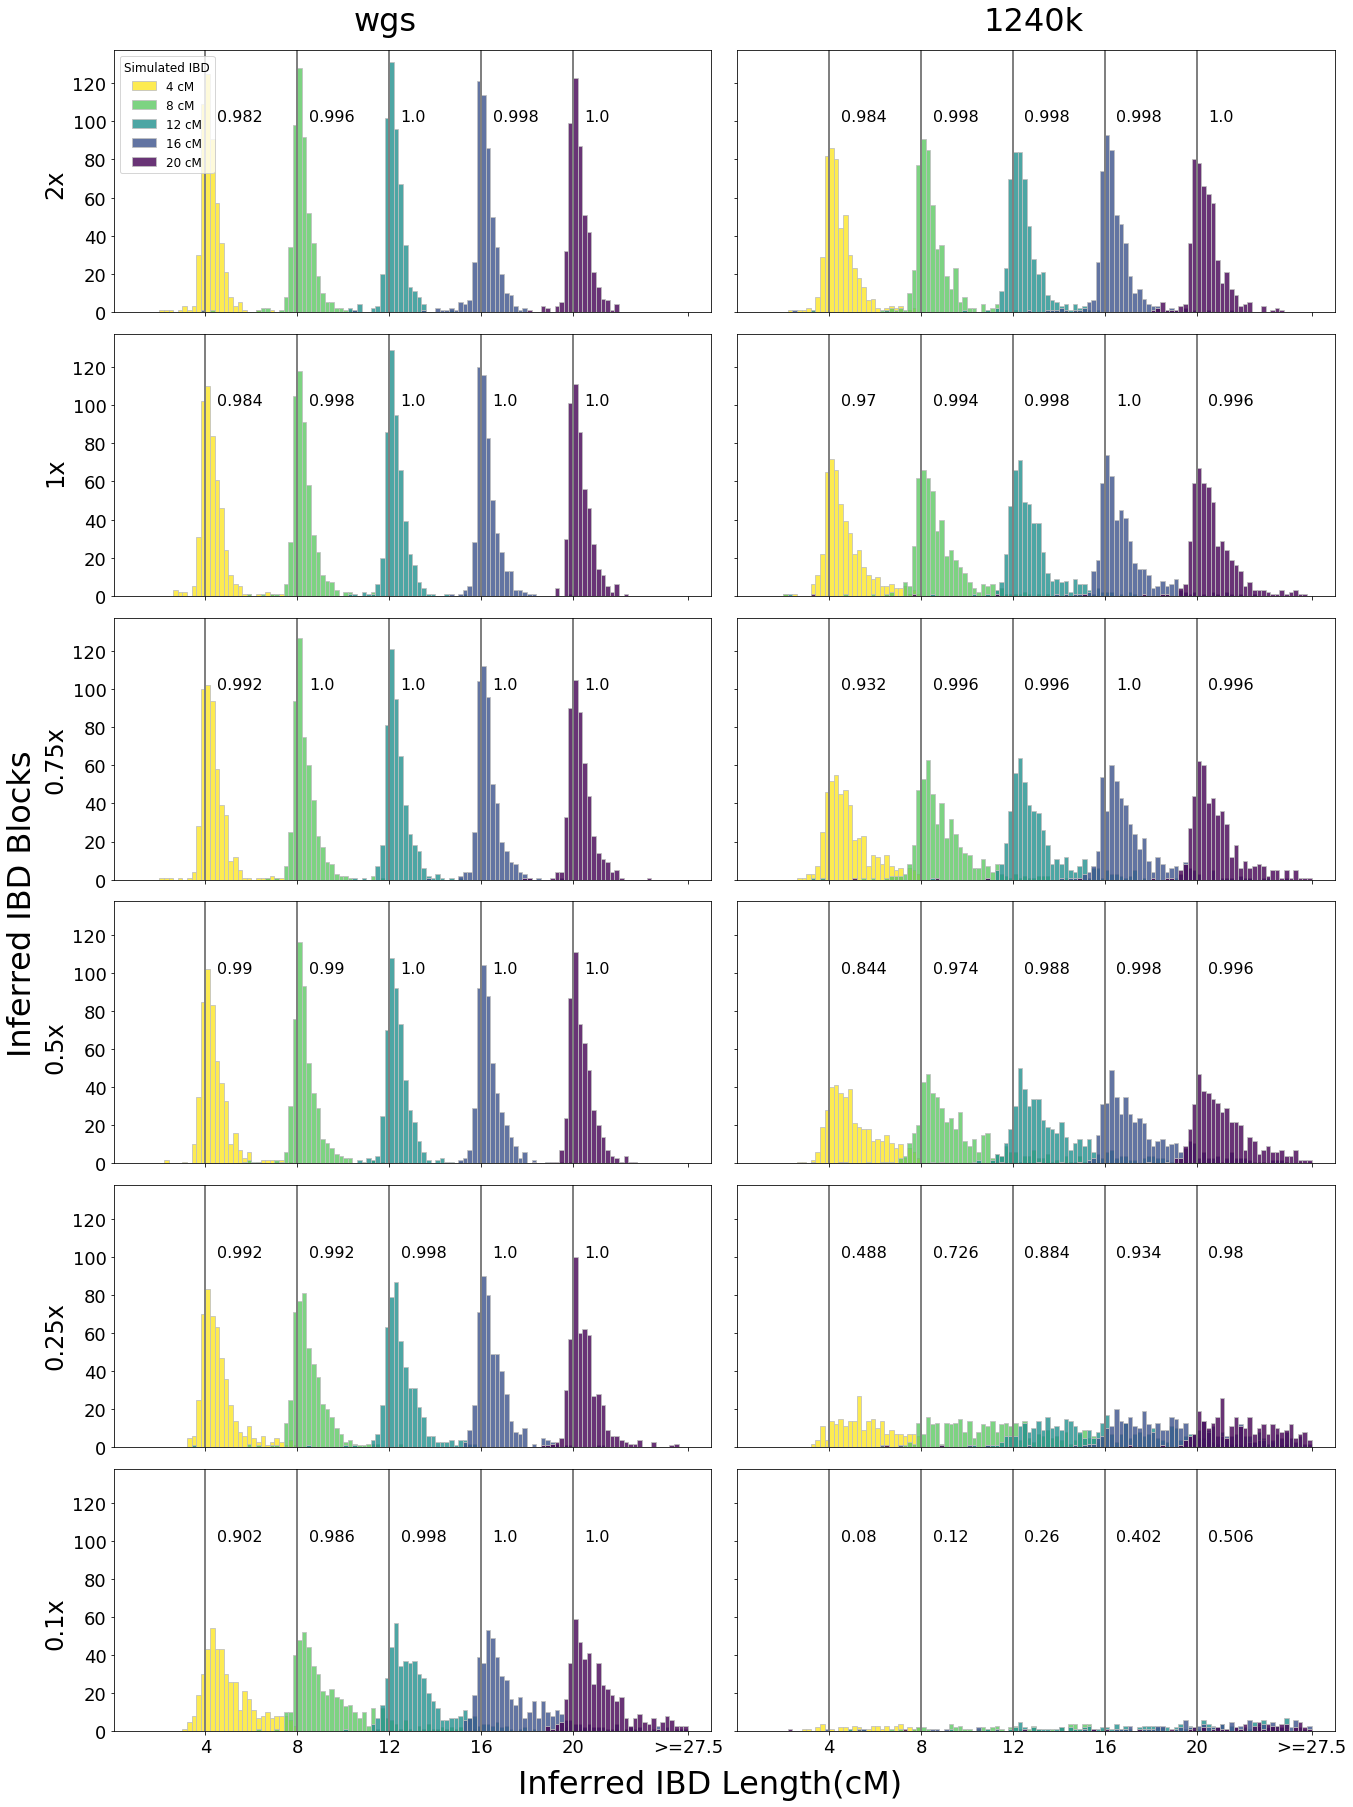

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

plt.rcParams["font.family"] = "Arial"
fig, axs = plt.subplots(6, 2, sharex=True, sharey=True, figsize=(18, 24), tight_layout=True)

covs = ['cov2', 'cov1', 'cov3over4', 'cov1over2', 'cov1over4', 'cov1over10']
cov2str = {'cov2':'2x', 'cov1':'1x', 'cov3over4':'0.75x', 'cov1over2':'0.5x', 'cov1over4':'0.25x', 'cov1over10':'0.1x'}
modes = ['wgs', '1240k']

bl_lens = [4, 8, 12, 16, 20]
bins = np.linspace(0, 25, 126) # bins of 0.2cm

fs_l = 12
fs = 12
fs_t = 18
color_fp = "red"
ec = "silver"
cmap = "viridis_r"
alpha = 0.8
xlim = (0,26)

biasTable = []
biasTable.append(np.zeros((len(covs), len(bl_lens))))
biasTable.append(np.zeros((len(covs), len(bl_lens))))


for row, cov in enumerate(covs):
    for col, mode in enumerate(modes):
        df_fp = pd.read_csv(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_{mode}/calledIBD_strict/{cov}/ch3_0cm/ch3.tsv', sep='\t')
        df_fp = df_fp[df_fp['lengthM']>=0.04]
        print(f'number of FP before filtering: {len(df_fp)}')
        df_fp = df_fp[(df_fp['End'] - df_fp['Start'])/(df_fp['lengthM']*100) >= 220]
        print(f'number of FP after filtering: {len(df_fp)}')
        df_called, powers = lengthCallAll(bl_lens, cov, f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_{mode}/calledIBD_strict', threshold=0.8)
        assert(len(bl_lens)==len(df_called)==len(powers)) # Sanity Check
    
        ### Set Colors
        cmap = cm.get_cmap(cmap)
        colors = [cmap(x) for x in np.linspace(0,1, len(bl_lens))]
    
        ####### Do the actual Plot
        ax = axs[row, col]
        # Plot All Histograms        
        for i in range(len(bl_lens)):
            l = bl_lens[i]
            df_called_trunc = np.array(df_called[i])
            biasTable[col][row, i] = np.mean(df_called_trunc)
            df_called_trunc[df_called_trunc>=27.5] = 27.5
            ax.hist(df_called_trunc, bins = bins, color = colors[i], alpha=alpha, 
                label= str(l) + " cM", ec=ec)
            ax.axvline(l, color = "gray", linewidth=2)
            ax.text(l+0.5, 100, round(powers[i], 3), fontsize=16, fontweight='roman')
    
        # if len(df_fp)>0:
        #     ax.hist(df_fp["lengthM"]*100, bins = bins, color = color_fp, 
        #         alpha=0.5, label= "FP", ec=ec)
        
        ax.set_xlim(xlim)
        ax.set_xticks(bl_lens + [25])
        ax.set_xticklabels(bl_lens + ['>=27.5'])
        ax.tick_params(axis='both', labelsize=fs_t)
        if row == col == 0:
            legend = ax.legend(loc = 'upper left', fontsize = fs_l, title="Simulated IBD")
            legend.get_title().set_fontsize(fs_l)
    fig.text(-0.005, 11/12 - row/6, cov2str[cov], ha='center', va='center', rotation='vertical', fontsize=24)

fig.text(0.25, 1.01, 'wgs', ha='center', va='center', fontsize=32)
fig.text(0.75, 1.01, '1240k', ha='center', va='center', fontsize=32)

fig.text(0.5, -0.01, 'Inferred IBD Length(cM)', ha='center', va='center', fontsize=32)
fig.text(-0.03, 0.5, 'Inferred IBD Blocks', ha='center', va='center', rotation='vertical', fontsize=32)
plt.savefig('syntheticIBDpanel_supp.png', dpi=300, bbox_inches="tight")
plt.savefig('syntheticIBDpanel_supp.pdf', dpi=300, bbox_inches="tight")


print(biasTable[0])
print(biasTable[1])

In [16]:
df_wgs = pd.DataFrame(biasTable[0], columns=['4cM', '8cM', '12cM', '16cM', '20cM'], index=[cov2str[cov] for cov in covs])
df_1240k = pd.DataFrame(biasTable[1], columns=['4cM', '8cM', '12cM', '16cM', '20cM'], index=[cov2str[cov] for cov in covs])
latex_wgs = df_wgs.to_latex(float_format="%.3f", bold_rows=True, label='bias_wgs', caption='Mean Inferred Segment Length for WGS-like Data')
latex_1240k = df_1240k.to_latex(float_format="%.3f", bold_rows=True, label='bias_1240k', caption='Mean Inferred Segment Length for 1240k-like Data')

/tmp/ipykernel_2119704/1107104116.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_wgs = df_wgs.to_latex(float_format="%.3f", bold_rows=True, label='bias_wgs', caption='Mean Inferred Segment Length for WGS-like Data')
/tmp/ipykernel_2119704/1107104116.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_1240k = df_1240k.to_latex(float_format="%.3f", bold_rows=True, label='bias_1240k', caption='Mean Inferred Segment Length for 1240k-like Data')


In [17]:
print(latex_1240k)

\begin{table}
\centering
\caption{Mean Inferred Segment Length for 1240k-like Data}
\label{bias_1240k}
\begin{tabular}{lrrrrr}
\toprule
{} &   4cM &    8cM &   12cM &   16cM &   20cM \\
\midrule
\textbf{2x   } & 4.453 &  8.467 & 12.439 & 16.372 & 20.419 \\
\textbf{1x   } & 4.643 &  8.711 & 12.759 & 16.763 & 20.609 \\
\textbf{0.75x} & 4.823 &  8.944 & 13.018 & 17.063 & 20.812 \\
\textbf{0.5x } & 5.071 &  9.538 & 13.638 & 17.849 & 21.413 \\
\textbf{0.25x} & 5.512 & 11.191 & 16.386 & 20.253 & 24.714 \\
\textbf{0.1x } & 5.687 & 11.790 & 18.610 & 24.425 & 29.768 \\
\bottomrule
\end{tabular}
\end{table}



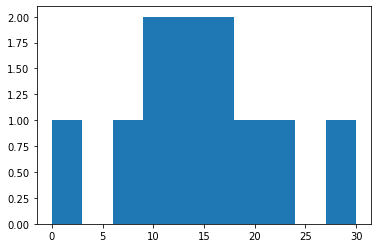

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a = [0, 6, 9, 11, 13, 14, 15, 16, 18, 23, 29]
plt.hist(a, bins=np.arange(31,step=3))
plt.show()

In [10]:
a = np.array([1, 19, 23, 942, 67, 104, 31, 11, 42, 81, 56])
median = np.median(a)
MAD = np.median(np.abs(a-median))

In [11]:
MAD

25.0